In [420]:
import pandas as pd
import matplotlib.pyplot as plt


In [421]:
crimes = pd.read_csv("Index_Crimes_by_County_and_Agency__Beginning_1990.csv")
hateCrimes = pd.read_csv("Hate_Crimes_by_County_and_Bias_Type__Beginning_2010.csv")


 **The main dataset we're working on is the crimes dataset, it is a dataset about crimes that were reported in New-York state, a state in the US, from 1990 to 2020, which county in the state they occured in, and what agency were they reported to.**
 
 **Since New-York city, a city in New-York state, is very important, a column in the dataset specifies whether the county is in New-York city or not.**
 
 **The hate crimes dataset is about hate crimes that occured in the same counties in New-York state, who they were against, and if they were against a person or their property. It is just complementary data that we might use in answering some questions and reaching certain conclusions, it it mostly cleaned and ready to go**

In [422]:
# we're going to start cleaning the "Crimes" dataset first
# changing the name of some columns to be more descriptive
crimes.rename(
    columns={
        "Index Total": "Total Reported Crimes",
        "Violent Total": "Total Violent Crimes",
        "Property Total": "Total Property Crimes",
    },
    inplace=True,
)


In [423]:
# checking nulls
crimes.isnull().sum()


County                      0
Agency                      0
Year                        0
Months Reported          9493
Total Reported Crimes     384
Total Violent Crimes      384
Murder                    384
Rape                      384
Robbery                   384
Aggravated Assault        384
Total Property Crimes     384
Burglary                  384
Larceny                   384
Motor Vehicle Theft       384
Region                      0
dtype: int64

In [424]:
# dropping the "Months Reported" column. It has many null values and is not really relevant to the data we want to extract
crimes.drop(["Months Reported"], axis=1, inplace=True)
crimes


,County,Agency,Year,Total Reported Crimes,Total Violent Crimes,Murder,Rape,Robbery,Aggravated Assault,Total Property Crimes,Burglary,Larceny,Motor Vehicle Theft,Region
0,Albany,Albany City PD,2020,"3,547",875,18,61,164,632,"2,672",430,"1,958",284,Non-New York City
1,Albany,Albany County Park PD,2020,2,0,0,0,0,0,2,0,2,0,Non-New York City
2,Albany,Albany County Sheriff,2020,127,12,0,4,0,8,115,11,96,8,Non-New York City
3,Albany,Albany County State Police,2020,103,26,0,18,2,6,77,4,71,2,Non-New York City
4,Albany,Altamont Vg PD,2020,6,2,0,0,0,2,4,0,4,0,Non-New York City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21223,Yates,County Total,1990,507,34,0,5,0,29,473,104,361,8,Non-New York City
21224,Yates,Penn Yan Vg PD,1990,142,3,0,1,0,2,139,11,123,5,Non-New York City
21225,Yates,Yates County Park PD,1990,1,0,0,0,0,0,1,0,1,0,Non-New York City
21226,Yates,Yates County Sheriff,1990,318,29,0,4,0,25,289,84,202,3,Non-New York City


In [425]:
# dropping all rows with nulls as they are insignificant in relation to the data
crimes.dropna(axis=0, inplace=True)
crimes.isnull().sum()


County                   0
Agency                   0
Year                     0
Total Reported Crimes    0
Total Violent Crimes     0
Murder                   0
Rape                     0
Robbery                  0
Aggravated Assault       0
Total Property Crimes    0
Burglary                 0
Larceny                  0
Motor Vehicle Theft      0
Region                   0
dtype: int64

In [426]:
# converting the region column to numerical values
crimes = pd.get_dummies(crimes, columns=["Region"])
crimes


,County,Agency,Year,Total Reported Crimes,Total Violent Crimes,Murder,Rape,Robbery,Aggravated Assault,Total Property Crimes,Burglary,Larceny,Motor Vehicle Theft,Region_New York City,Region_Non-New York City
0,Albany,Albany City PD,2020,"3,547",875,18,61,164,632,"2,672",430,"1,958",284,0,1
1,Albany,Albany County Park PD,2020,2,0,0,0,0,0,2,0,2,0,0,1
2,Albany,Albany County Sheriff,2020,127,12,0,4,0,8,115,11,96,8,0,1
3,Albany,Albany County State Police,2020,103,26,0,18,2,6,77,4,71,2,0,1
4,Albany,Altamont Vg PD,2020,6,2,0,0,0,2,4,0,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21223,Yates,County Total,1990,507,34,0,5,0,29,473,104,361,8,0,1
21224,Yates,Penn Yan Vg PD,1990,142,3,0,1,0,2,139,11,123,5,0,1
21225,Yates,Yates County Park PD,1990,1,0,0,0,0,0,1,0,1,0,0,1
21226,Yates,Yates County Sheriff,1990,318,29,0,4,0,25,289,84,202,3,0,1


In [427]:
# we want to change the datatype of all columns to int except the County and Agency columns, to make it easier to process and
# operate on all the data, so we are dropping them, changing the datatype of the whole datafram, then adding them again

# because some values has ',' in it so it cant be converted to int
crimes.replace(",", "", regex=True, inplace=True)
# we made a temp var with all collumns except Count and Agency and converted them to int
crimes_int_values_transformed = crimes.loc[
    :, (crimes.columns != "County") & (crimes.columns != "Agency")
].astype("int")
# then we changed those same collumns to the new values the int ones
crimes.loc[
    :, (crimes.columns != "County") & (crimes.columns != "Agency")
] = crimes_int_values_transformed
crimes.dtypes


County                      object
Agency                      object
Year                         int32
Total Reported Crimes        int32
Total Violent Crimes         int32
Murder                       int32
Rape                         int32
Robbery                      int32
Aggravated Assault           int32
Total Property Crimes        int32
Burglary                     int32
Larceny                      int32
Motor Vehicle Theft          int32
Region_New York City         int32
Region_Non-New York City     int32
dtype: object

In [428]:
# making another dataframe that only includes the total crimes reported in each county each year to make it easier to aggregate
totalCrimes = crimes[crimes["Agency"] == "County Total"]
# we dropped the Agency column since we dont need it anymore
totalCrimes = totalCrimes.drop("Agency", axis=1)
ttc = totalCrimes.copy()


In [429]:
hateCrimes


,County,Year,Crime Type,Anti-Male,Anti-Female,Anti-Transgender,Anti-Gender Non-Conforming,Anti-Age*,Anti-White,Anti-Black,...,Anti-Gay Male,Anti-Gay Female,Anti-Gay (Male and Female),Anti-Heterosexual,Anti-Bisexual,Anti-Physical Disability,Anti-Mental Disability,Total Incidents,Total Victims,Total Offenders
0,Albany,2020,Crimes Against Persons,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,3,3,4
1,Albany,2020,Property Crimes,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
2,Bronx,2020,Crimes Against Persons,0,0,1,1,0,0,0,...,2,2,0,0,0,0,0,9,10,12
3,Bronx,2020,Property Crimes,0,0,0,0,0,0,2,...,1,0,0,0,0,0,0,13,13,13
4,Broome,2020,Crimes Against Persons,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,Ulster,2010,Property Crimes,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
669,Washington,2010,Crimes Against Persons,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
670,Wayne,2010,Crimes Against Persons,0,0,0,0,0,0,2,...,1,0,0,0,0,0,0,3,3,3
671,Westchester,2010,Crimes Against Persons,0,0,0,0,0,1,3,...,4,0,1,0,0,0,0,16,16,21


In [430]:
## dropping columns which don't have any value at all and sum up to zero
hateCrimes.sum()
hateCrimes.drop(
    columns=[
        "Anti-Native Hawaiian/Pacific Islander",
        "Anti-Other Race",
        "Anti-Atheism/Agnosticism",
        "Anti-Sikh",
        "Anti-Non-Hispanic*",
    ]
)


,County,Year,Crime Type,Anti-Male,Anti-Female,Anti-Transgender,Anti-Gender Non-Conforming,Anti-Age*,Anti-White,Anti-Black,...,Anti-Gay Male,Anti-Gay Female,Anti-Gay (Male and Female),Anti-Heterosexual,Anti-Bisexual,Anti-Physical Disability,Anti-Mental Disability,Total Incidents,Total Victims,Total Offenders
0,Albany,2020,Crimes Against Persons,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,3,3,4
1,Albany,2020,Property Crimes,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
2,Bronx,2020,Crimes Against Persons,0,0,1,1,0,0,0,...,2,2,0,0,0,0,0,9,10,12
3,Bronx,2020,Property Crimes,0,0,0,0,0,0,2,...,1,0,0,0,0,0,0,13,13,13
4,Broome,2020,Crimes Against Persons,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,Ulster,2010,Property Crimes,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
669,Washington,2010,Crimes Against Persons,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
670,Wayne,2010,Crimes Against Persons,0,0,0,0,0,0,2,...,1,0,0,0,0,0,0,3,3,3
671,Westchester,2010,Crimes Against Persons,0,0,0,0,0,1,3,...,4,0,1,0,0,0,0,16,16,21


In [431]:
# In the Hate Crimes dataset, converting the "crime type" column to numerical values
hateCrimes = pd.get_dummies(hateCrimes, columns=["Crime Type"])


**We will not handle duplicate values and outliers because it it logical to have such values in out datasets, as this is real crime data and there might be duplicate rates in different years or counties, or there might be some countries with significantlly higher or lower rates. 
The data is very unlikely to be inaccurate because it is directly from the New-York 
state government.**

# Aggregation

In [432]:
## counting the total number of crimes that were reported in the last 30 years in the whole New-York state (all counties)
totalCrimes["Total Reported Crimes"].sum()


18192492

In [433]:
## calculating the mean of all crimes reported per year in the whole state
totalCrimes.groupby("Year")["Total Reported Crimes"].mean()


Year
1990    18349.822581
1991    18169.403226
1992    17073.967742
1993    16299.629032
1994    14825.967742
1995    13347.806452
1996    12115.532258
1997    11441.080645
1998    10469.709677
1999     9726.338710
2000     9438.274194
2001     8991.693548
2002     8692.096774
2003     8372.193548
2004     8074.838710
2005     7893.532258
2006     7707.532258
2007     7435.403226
2008     7495.016129
2009     7257.564516
2010     7265.032258
2011     7240.548387
2012     7296.145161
2013     6978.951613
2014     6615.790323
2015     6313.661290
2016     6096.564516
2017     5857.064516
2018     5630.225806
2019     5432.467742
2020     5523.435484
Name: Total Reported Crimes, dtype: float64

In [434]:
## counting total offendors of hate crimes in the last 10 years
hateCrimes["Total Offenders"].sum()


7340

In [435]:
## counting total victims of hate crimes in the last 10 years
hateCrimes["Total Victims"].sum()


6679

In [436]:
## counting the total of hate crimes in the last 10 years
hateCrimes["Total Incidents"].sum()


6469

**We can see that the total offenders are more that the total of victims, because some of these offenders
committed hate crimes against properties and not people.** <b>     
**And the total incidents is less than the offenders becuase there are crimes with more than one offender.**

In [437]:
## counting the sum of all crimes against both people and properties in the past 10 years in the state

peopleCrimes = hateCrimes.loc[(hateCrimes["Crime Type_Crimes Against Persons"] == 1)]
peopleCrimesSum = peopleCrimes["Total Incidents"].sum()
propertyCrimes = hateCrimes.loc[(hateCrimes["Crime Type_Property Crimes"] == 1)]
propertyCrimesSum = propertyCrimes["Total Incidents"].sum()
print(peopleCrimesSum)
print(propertyCrimesSum)


3067
3402


In [438]:
## statistics on the total crimes dataset
totalCrimes.describe()


,Year,Total Reported Crimes,Total Violent Crimes,Murder,Rape,Robbery,Aggravated Assault,Total Property Crimes,Burglary,Larceny,Motor Vehicle Theft,Region_New York City,Region_Non-New York City
count,1922.0000,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000
mean,2005.0000,9465.396462,1719.244017,17.659729,67.274194,730.298127,904.011967,7746.152445,1438.941207,5380.853278,926.357960,0.080645,0.919355
std,8.9466,21528.043044,5413.099424,61.687798,126.022726,2816.110239,2505.164124,16535.903467,3349.195539,10526.661185,3753.210731,0.272360,0.272360
min,1990.0000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,26.000000,5.000000,18.000000,0.000000,0.000000,0.000000
25%,1997.0000,1013.500000,90.000000,0.000000,10.000000,6.000000,60.250000,905.000000,197.000000,653.500000,24.000000,0.000000,1.000000
50%,2005.0000,2011.000000,175.000000,2.000000,24.000000,18.000000,130.000000,1840.500000,375.000000,1410.000000,49.000000,0.000000,1.000000
75%,2013.0000,6359.500000,663.000000,7.000000,60.000000,190.250000,429.750000,5649.500000,1052.250000,4296.250000,246.750000,0.000000,1.000000
max,2020.0000,217786.000000,63087.000000,786.000000,1159.000000,36341.000000,24828.000000,173352.000000,39041.000000,122704.000000,50300.000000,1.000000,1.000000


In [439]:
hateCrimes.describe()


,Year,Anti-Male,Anti-Female,Anti-Transgender,Anti-Gender Non-Conforming,Anti-Age*,Anti-White,Anti-Black,Anti-American Indian/Alaskan Native,Anti-Asian,...,Anti-Gay (Male and Female),Anti-Heterosexual,Anti-Bisexual,Anti-Physical Disability,Anti-Mental Disability,Total Incidents,Total Victims,Total Offenders,Crime Type_Crimes Against Persons,Crime Type_Property Crimes
count,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,...,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000
mean,2014.976226,0.005944,0.020802,0.109955,0.043091,0.037147,0.361070,1.714710,0.005944,0.193165,...,0.102526,0.001486,0.002972,0.011887,0.007429,9.612184,9.924220,10.906389,0.537890,0.462110
std,3.230624,0.076922,0.255035,0.561492,0.243213,0.419167,1.138647,2.382109,0.076922,0.824557,...,0.432885,0.038547,0.054473,0.108459,0.085937,16.838951,17.275306,19.423273,0.498933,0.498933
min,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,3.000000,1.000000,0.000000
75%,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,9.000000,10.000000,1.000000,1.000000
max,2020.000000,1.000000,6.000000,5.000000,3.000000,9.000000,16.000000,18.000000,1.000000,14.000000,...,6.000000,1.000000,1.000000,1.000000,1.000000,122.000000,124.000000,128.000000,1.000000,1.000000


# Anserwing Qusetions

**1- Did the Covid-19 Pandemic affect crime rates?**

In [440]:
totalCrimes.groupby("Year")["Total Reported Crimes"].sum()


Year
1990    1137689
1991    1126503
1992    1058586
1993    1010577
1994     919210
1995     827564
1996     751163
1997     709347
1998     649122
1999     603033
2000     585173
2001     557485
2002     538910
2003     519076
2004     500640
2005     489399
2006     477867
2007     460995
2008     464691
2009     449969
2010     450432
2011     448914
2012     452361
2013     432695
2014     410179
2015     391447
2016     377987
2017     363138
2018     349074
2019     336813
2020     342453
Name: Total Reported Crimes, dtype: int32

**We can see that in 2020, the total of the crimes was slightly more than 2019, and somewhat close to the number of crimes in 2018. So we can infer that the Covid-19 pandemic didn't really have much of an effect on the crime rate in New-York State.**

In [441]:
hateCrimes.groupby("Year")["Total Incidents"].sum()


Year
2010    703
2011    556
2012    735
2013    617
2014    558
2015    503
2016    599
2017    560
2018    527
2019    623
2020    488
Name: Total Incidents, dtype: int64

**However, in the hate crimes dataset, we can see that 2020 had the least hate crimes in the last 10 years. Which means that the pandemic and lockdown had some kind of effect on the rate of hate crimes in New-York State.**

**2- What are the total crimes reported in per decade (1990s, 2000s, 2010s), and which decades had the least and most crimes?**

In [442]:
## making a copy of the totalCrimes df to cut the years into decades without changing the original df
bins = [1990, 1999, 2009, 2020]
totalCrimesDecades = totalCrimes.copy()
totalCrimesDecades['Year'] = pd.cut(totalCrimes['Year'], bins,  labels=["1990s", "2000s", "2010s"], include_lowest = True)
display(totalCrimesDecades)

,County,Year,Total Reported Crimes,Total Violent Crimes,Murder,Rape,Robbery,Aggravated Assault,Total Property Crimes,Burglary,Larceny,Motor Vehicle Theft,Region_New York City,Region_Non-New York City
9,Albany,2010s,7412,1115,19,109,213,774,6297,708,5169,420,0,1
20,Allegany,2010s,401,73,3,38,3,29,328,86,214,28,0,1
26,Bronx,2010s,36217,13129,111,523,3519,8976,23088,2230,18728,2130,1,0
31,Broome,2010s,5180,660,5,126,78,451,4520,668,3634,218,0,1
41,Cattaraugus,2010s,868,125,1,37,6,81,743,137,552,54,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21148,Washington,1990s,1412,180,0,12,10,158,1232,294,892,46,0,1
21159,Wayne,1990s,2604,179,5,19,24,131,2425,543,1813,69,0,1
21175,Westchester,1990s,38145,3871,50,128,1927,1766,34274,6465,21564,6245,0,1
21216,Wyoming,1990s,1354,212,0,6,2,204,1142,406,683,53,0,1


In [443]:
totalCrimes.groupby("Year")["Total Reported Crimes"].sum()


Year
1990    1137689
1991    1126503
1992    1058586
1993    1010577
1994     919210
1995     827564
1996     751163
1997     709347
1998     649122
1999     603033
2000     585173
2001     557485
2002     538910
2003     519076
2004     500640
2005     489399
2006     477867
2007     460995
2008     464691
2009     449969
2010     450432
2011     448914
2012     452361
2013     432695
2014     410179
2015     391447
2016     377987
2017     363138
2018     349074
2019     336813
2020     342453
Name: Total Reported Crimes, dtype: int32

**We can see that the 1990s had the highest crime rate in New-York State in the last three decades, and that the 2010s have the lowest crimes, which also means that crime rates keep going down as time goes on.**

**3- Which group has that most hate crimes against? and How many of these crimes were against people and how many were against theri property?**

In [444]:
# First we find the group with the most hate crimes against them
allGroups = hateCrimes.iloc[:, 2:-5].sum()
print(allGroups[allGroups == allGroups.max()])

# Turns out its Anti-Jewish

# Then we find how many of the crimes against jewish people were against people and how many were against property

peopleCrimes = hateCrimes.loc[(hateCrimes["Crime Type_Crimes Against Persons"] == 1)]
peopleCrimesSum = peopleCrimes["Anti-Jewish"].sum()
propertyCrimes = hateCrimes.loc[(hateCrimes["Crime Type_Property Crimes"] == 1)]
propertyCrimesSum = propertyCrimes["Anti-Jewish"].sum()

print("Crimes against jewish people: " + str(peopleCrimesSum))
print("Crimes against jewish people's properties: " + str(propertyCrimesSum))


Anti-Jewish    2695
dtype: int64
Crimes against jewish people: 609
Crimes against jewish people's properties: 2086


In [445]:
# 437
#crimes[crimes["Year"] == "2010s"].Rape
#We have in hate crimes two rows for every county because there are against property and against people
#so we get add them together on one to be able to concat crimes and hate crimes dataframes

#so first we get those duplicate counties
duplicateCounties = hateCrimes[hateCrimes.duplicated(subset=["County", "Year"], keep=False)]
#then we get people and property each in diffrent variable to add them
againstProperty = hateCrimes[hateCrimes.duplicated(subset=["County", "Year"], keep='first')]
againstPeople = hateCrimes[hateCrimes.duplicated(subset=["County", "Year"], keep='last')]

#then we get the unique ones by dropping all duplicate ones
uniqueCounties = hateCrimes.drop(againstProperty.index)
uniqueCounties = uniqueCounties.drop(againstPeople.index)
u2 = hateCrimes.unique()

#then we add those two together one on dataframe now there are no duplicate counties for each year
#so we change the index to county and year because its unique
duplicateAdded = againstProperty.set_index(['County', 'Year'])  + againstPeople.set_index(['County', 'Year'])
#then to make sure the concat is correct we change the index to county and year to concat unique with them
uniqueCounties.set_index(['County', 'Year'], inplace=True)
#now we can do this and have a no duplicate dataframe where every year have every county only one time
noDuplicates = pd.concat([duplicateAdded, uniqueCounties])




#then we collet all columns that have gender hate crimes and add them in one column
#get sum of those columns
Anti_Gender = noDuplicates.iloc[:, 0:4].sum(axis=1)
#concat this new column with the rest of the dataframe
anti_df = pd.concat([noDuplicates.iloc[:, 0:4], Anti_Gender, noDuplicates.iloc[:, 4:]], axis=1)
#rename it to Anti-Gender
anti_df.rename(columns={0: "Anti-Gender"}, inplace=True)


#now we do get the crimes dataframe ready to concat
#we set the index here too to compare with the anti one
crimes_newIndex = totalCrimes.set_index(['County', 'Year'])
#now we reindex it to remove any values thats not in anti_df one
crimes_newIndex = crimes_newIndex.reindex(anti_df.index)
#then we concat the two dataframes to one final dataframe
final_df = pd.concat([crimes_newIndex, anti_df], axis=1)
#and finaly we give it normal index to make county and year return to use them
final_df.reset_index(inplace=True)





#g = totalCrimes[totalCrimes["Year"] == "1990s"]

# we will have total crimes in years in diffrent dataframe

# do the cutting right

# we will get rape from total crimes

# compare and match county for both

# add them and see corr and vis it
cr = final_df.loc[
    :, (final_df.columns == "Rape") | (final_df.columns == "Anti-Gender")
]
print(cr.corr(method='pearson'))
crr = (cr-cr.mean())/(cr.std())
crr.plot(figsize= (15,6))

AttributeError: 'DataFrame' object has no attribute 'unique'

                Overall Crimes  Hate Crimes
Overall Crimes        1.000000     0.868791
Hate Crimes           0.868791     1.000000


<AxesSubplot:xlabel='Hate Crimes', ylabel='Overall Crimes'>

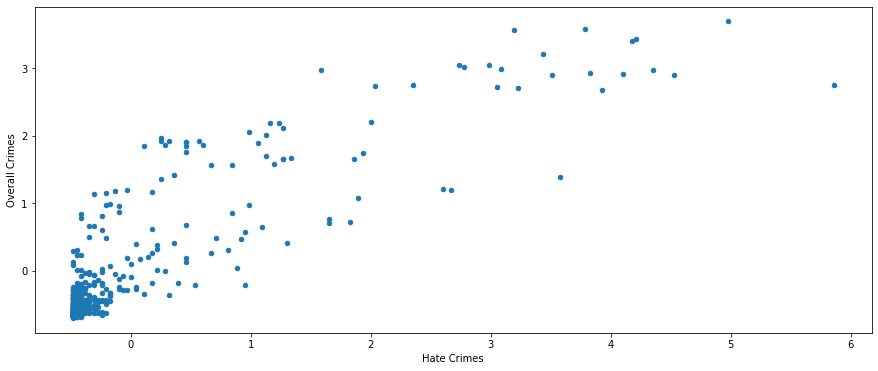

In [ ]:
#se we start with split our table to get our desired columns which is
#total incidents of hate crimes and total reported crimes overall
totals_df = final_df.loc[
    :, (final_df.columns == "Total Incidents") | (final_df.columns == "Total Reported Crimes")
]

#then we rename them to be more clear which column represent what
totals_df = totals_df.rename(
    columns={
        "Total Incidents": "Hate Crimes",
        "Total Reported Crimes": "Overall Crimes",
    },
)
#then we calculate our corraelatain
print(totals_df.corr(method='pearson'))
#then we normalize it to make it easier to visualize
normalizedTotals = (totals_df - totals_df.mean()) / (totals_df.std())
normalizedTotals.plot.scatter(x='Hate Crimes', y='Overall Crimes', figsize= (15,6))


In [ ]:
#we collect all columns with religion in them
AntiReligion_column = final_df.iloc[:, 27:42].sum(axis=1)

#then we concat this new column and add it to the old dataframe to work with it
AntiReligion_df = pd.concat([final_df.iloc[:, 0:42], AntiReligion_column, final_df.iloc[:, 42:]], axis=1)
AntiReligion_df.rename(columns={0: "Anti-Religious Groups"}, inplace=True)

#now we separate the ones in new York and the ones not in New York
inNewYork = AntiReligion_df.loc[(AntiReligion_df["Region_New York City"] == 1)]
notNewYork = AntiReligion_df.loc[(AntiReligion_df["Region_Non-New York City"] == 1)]

#then we print the sum of crimes to see which one have more crimes
print("Total hate crimes inside New York = " + str(notNewYork["Anti-Religious Groups"].sum()))
print("Total hate crimes outside of New York = " + str(inNewYork["Anti-Religious Groups"].sum()))

notNewYork["Anti-Religious Groups"].plot(figsize=(15,6))
inNewYork["Anti-Religious Groups"].plot(figsize=(15,6))
plt.legend(['Outside New York', 'Inside New York'])

Total hate crimes inside New York = 1084
Total hate crimes outside of New York = 2031


In [ ]:
u2

NameError: name 'u2' is not defined

In [ ]:
normalizedRapeAntiGender.plot.scatter(x='Rape', y='Anti-Gender', figsize= (15,6))